# Add 50% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 50)

Outliers found:


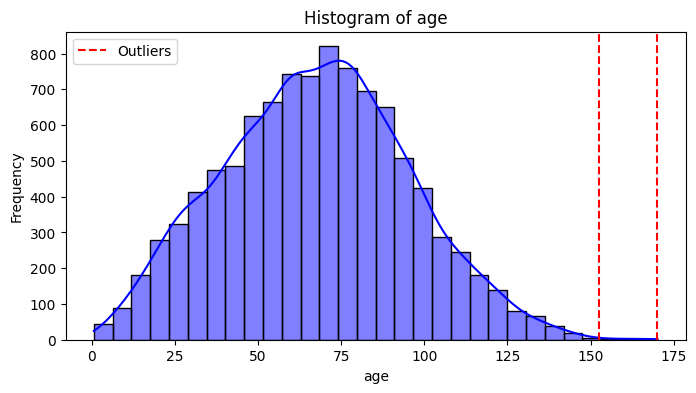

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1541
           1       0.83      0.94      0.88      1455

    accuracy                           0.88      2996
   macro avg       0.88      0.88      0.88      2996
weighted avg       0.88      0.88      0.88      2996

Node Labels:
 Annotation(0.598208, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3470.0, 3518.0]\nclass = 1')


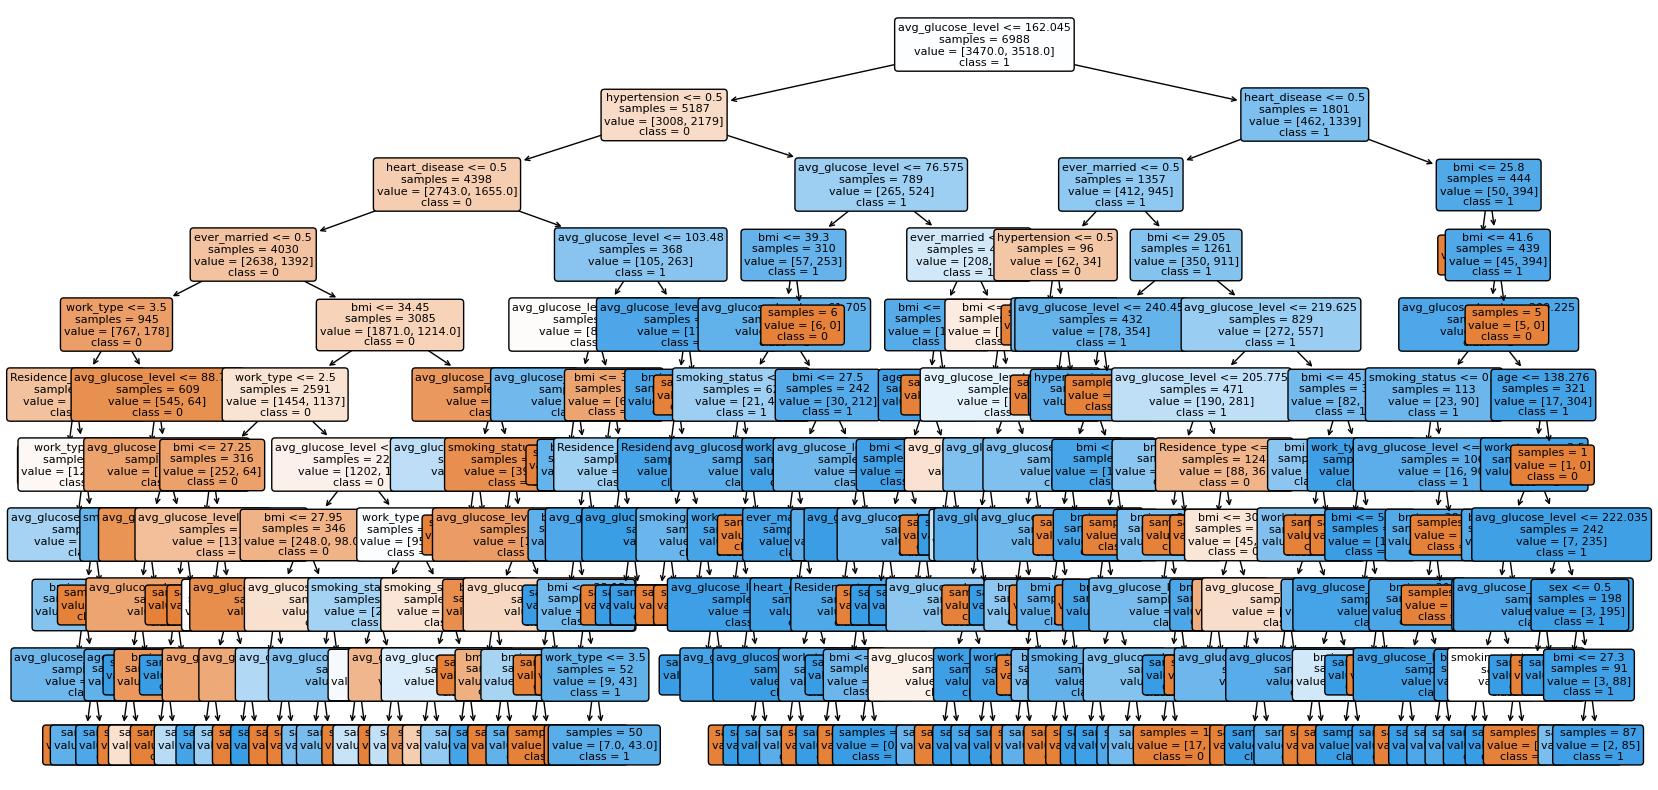

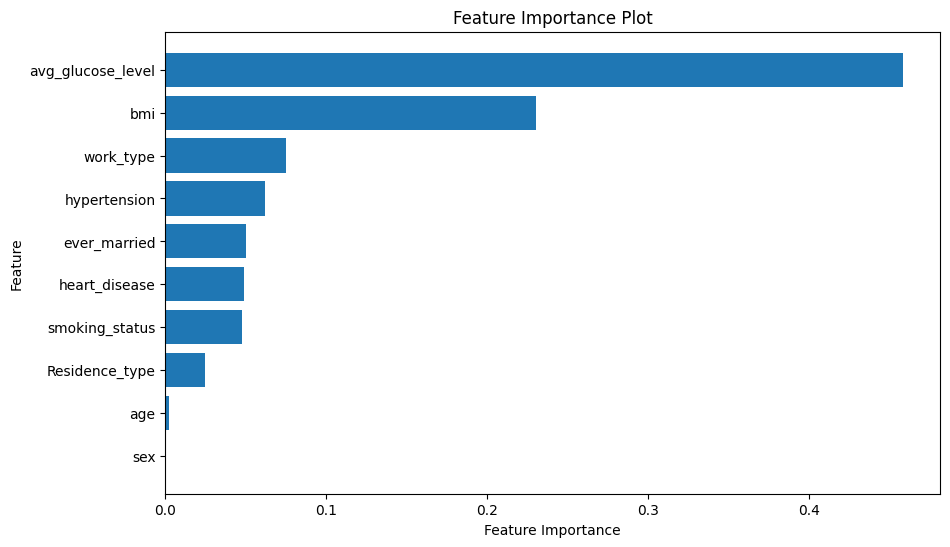

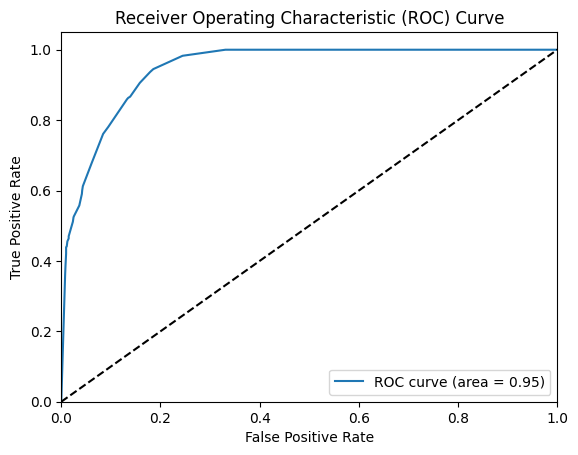

AUC Score: 0.9463835015866433


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.76, 0.7966666666666666, 0.8366666666666667, 0.8, 0.7966666666666666, 0.7866666666666666, 0.7993311036789298, 0.7892976588628763, 0.8361204013377926, 0.7959866220735786]
Mean accuracy: 0.7997402452619844
95% confidence interval: (0.7836036160585592, 0.8158768744654096)


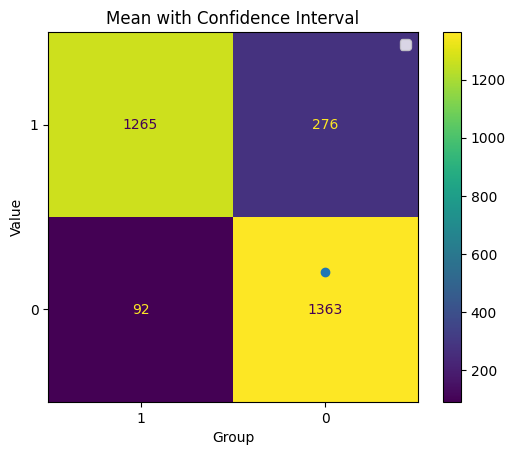

In [6]:
decision_tree = ML_algorithms.model_dt(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1541
           1       0.72      0.59      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



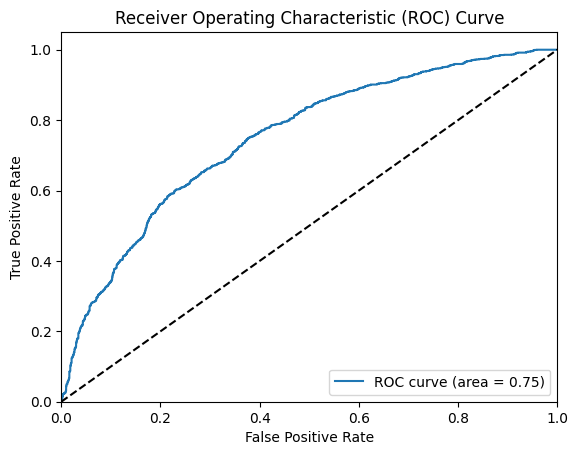

AUC Score: 0.7482466644812692


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7266666666666667, 0.6266666666666667, 0.6766666666666666, 0.7033333333333334, 0.6333333333333333, 0.6566666666666666, 0.6923076923076923, 0.6454849498327759, 0.6622073578595318, 0.6254180602006689]
Mean accuracy: 0.6648751393534003
95% confidence interval: (0.6402660760293778, 0.6894842026774227)


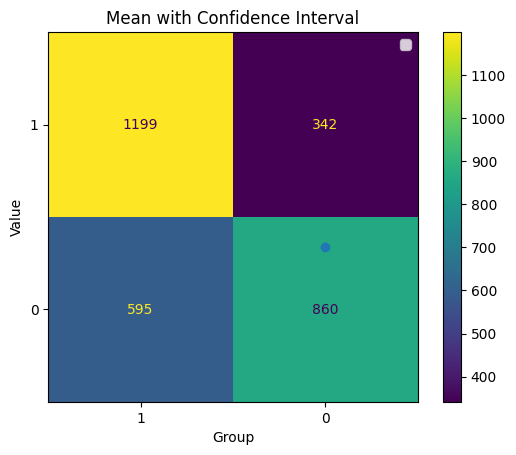

In [7]:
svm = ML_algorithms.model_svm(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

Outliers found:


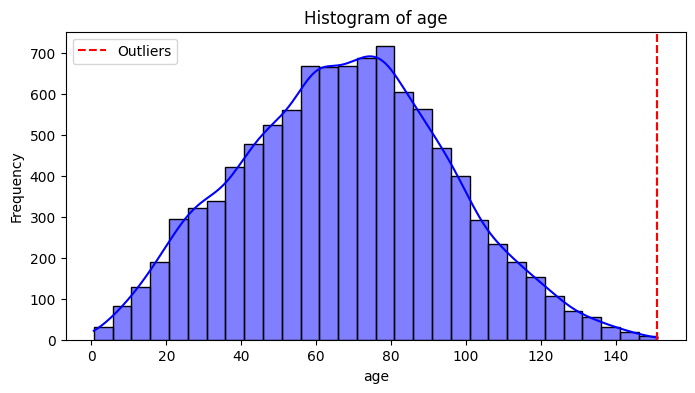

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1541
           1       0.83      0.94      0.88      1455

    accuracy                           0.88      2996
   macro avg       0.88      0.88      0.88      2996
weighted avg       0.88      0.88      0.88      2996

Node Labels:
 Annotation(0.598208, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3470.0, 3518.0]\nclass = 1')


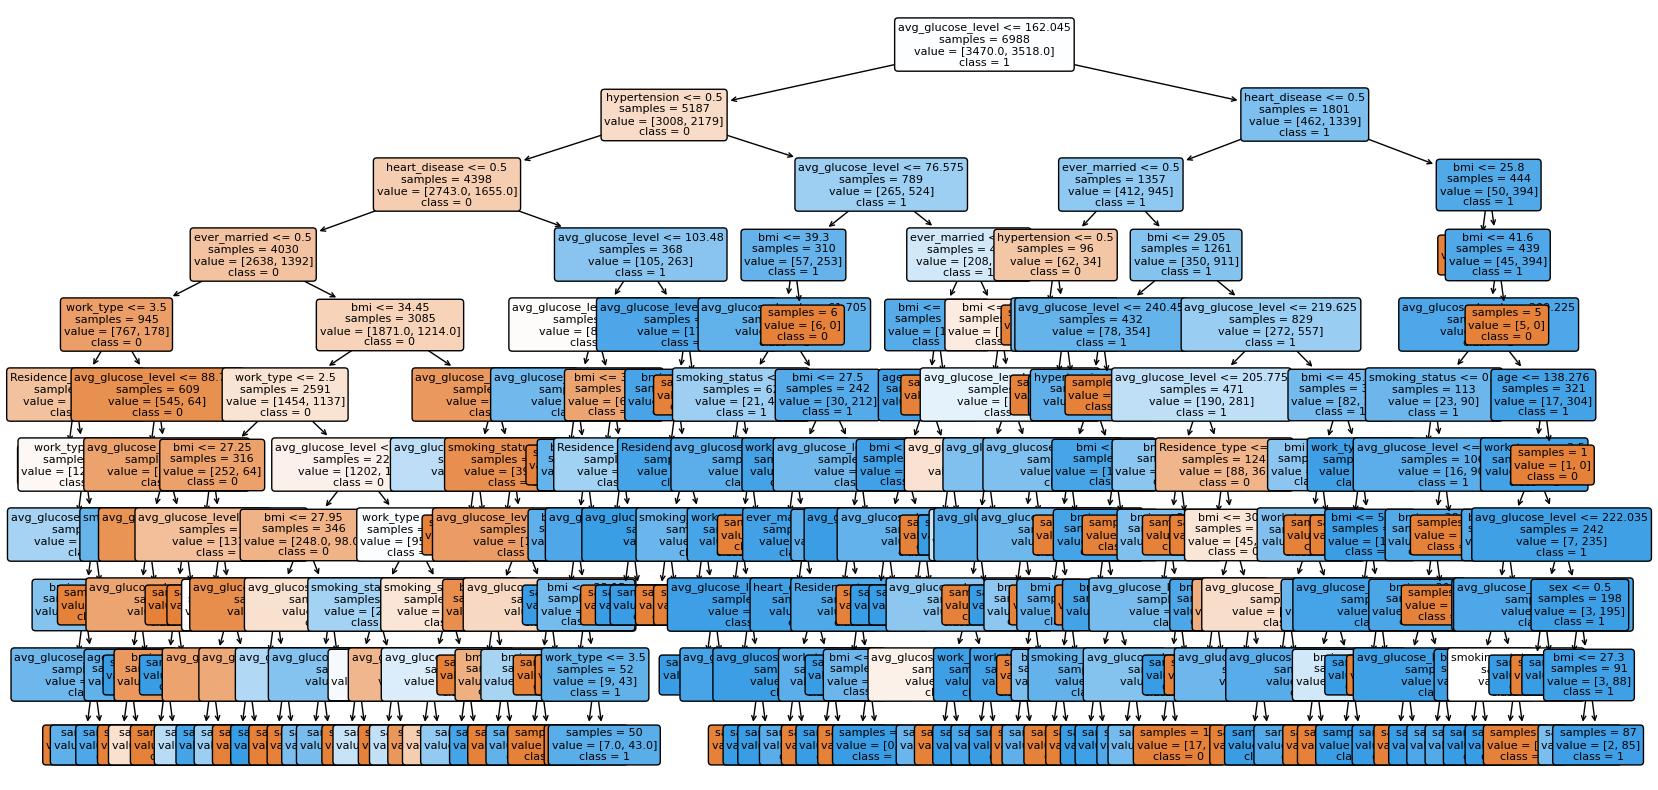

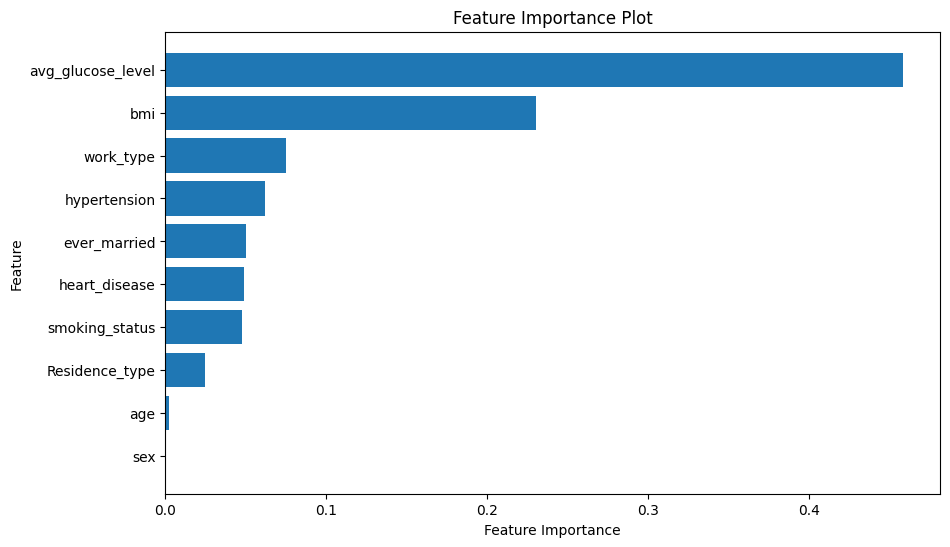

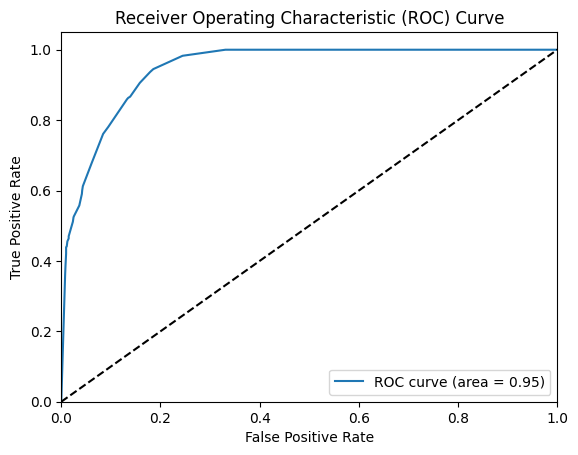

AUC Score: 0.9463835015866433


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8166666666666667, 0.81, 0.8333333333333334, 0.8033333333333333, 0.8033333333333333, 0.82, 0.7759197324414716, 0.7926421404682275, 0.8260869565217391, 0.7993311036789298]
Mean accuracy: 0.8080646599777035
95% confidence interval: (0.7959628877716722, 0.8201664321837348)


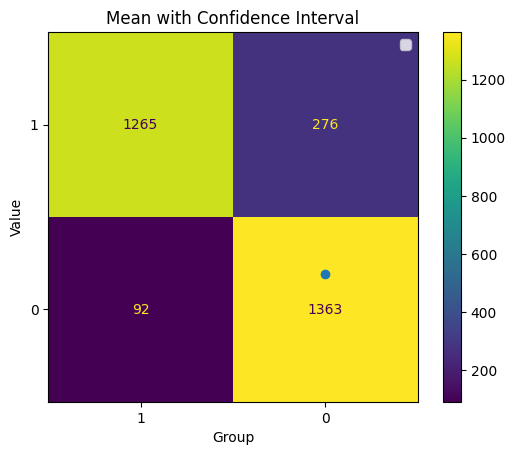

In [10]:
decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1541
           1       0.72      0.59      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



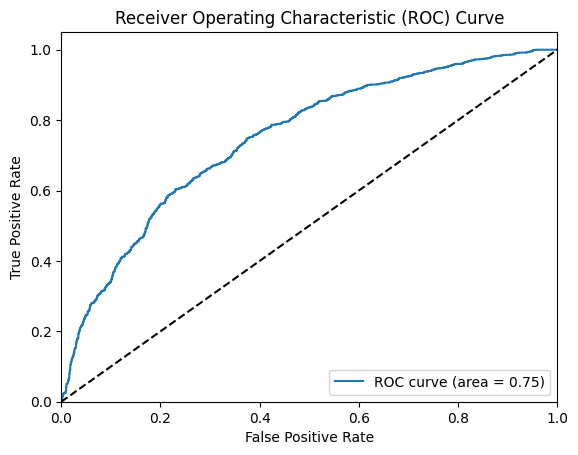

AUC Score: 0.7480312467246912


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7033333333333334, 0.6533333333333333, 0.7033333333333334, 0.6133333333333333, 0.6466666666666666, 0.6833333333333333, 0.6622073578595318, 0.6521739130434783, 0.6755852842809364, 0.6622073578595318]
Mean accuracy: 0.6655507246376812
95% confidence interval: (0.646024133461199, 0.6850773158141633)


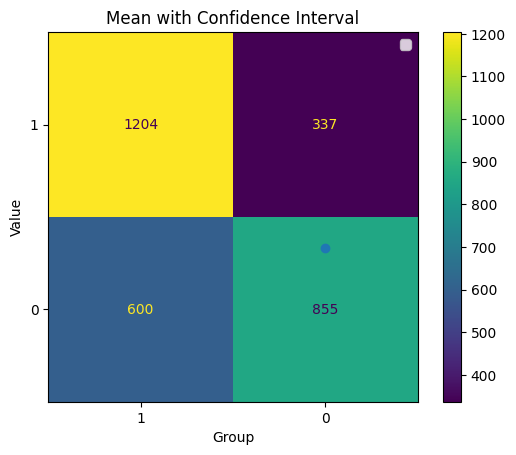

--------------------------------------


In [11]:
svm = ML_algorithms.model_svm(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 50)

Outliers found:


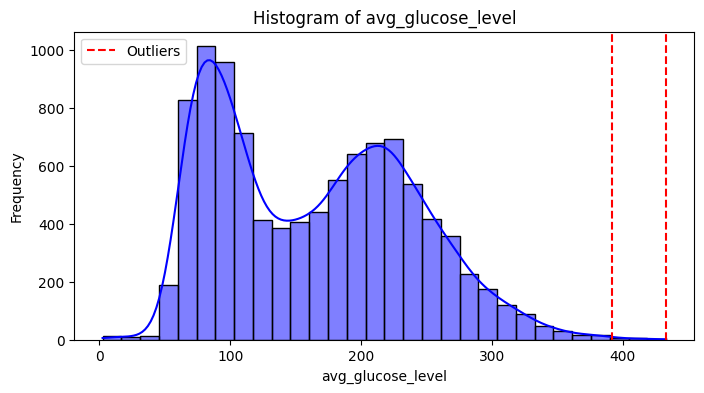

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1541
           1       0.78      0.79      0.78      1455

    accuracy                           0.79      2996
   macro avg       0.79      0.79      0.79      2996
weighted avg       0.79      0.79      0.79      2996

Node Labels:
 Annotation(0.579658, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3429, 3559]\nclass = 1')


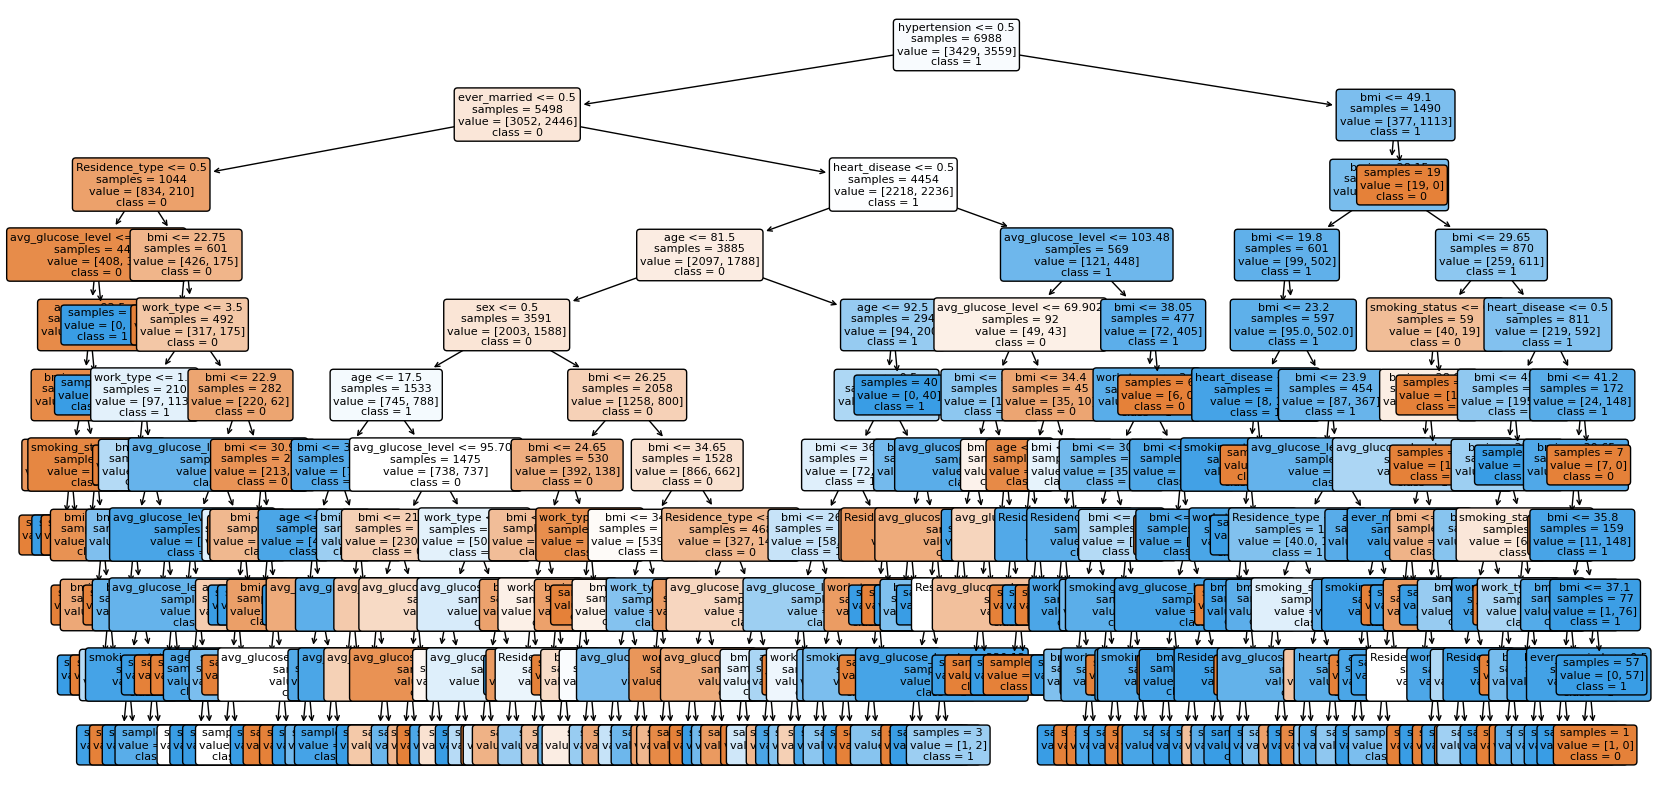

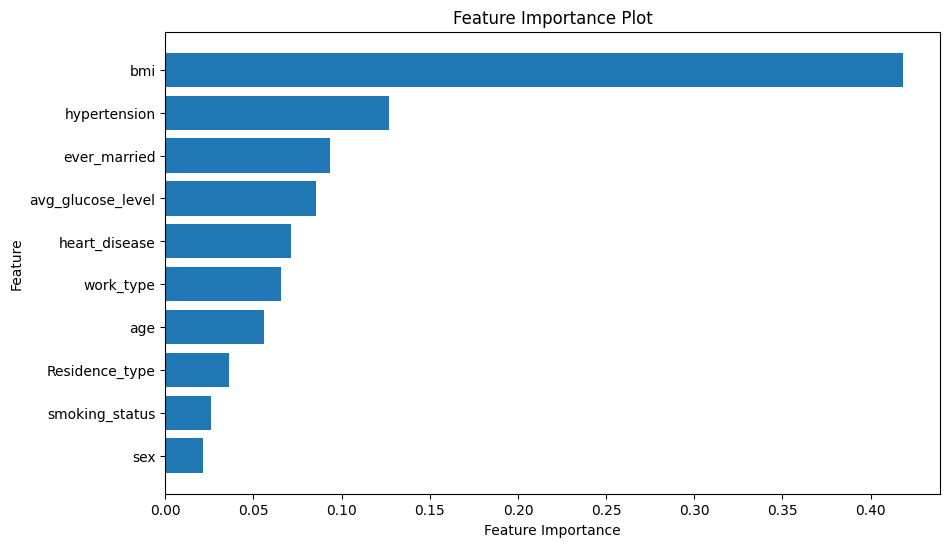

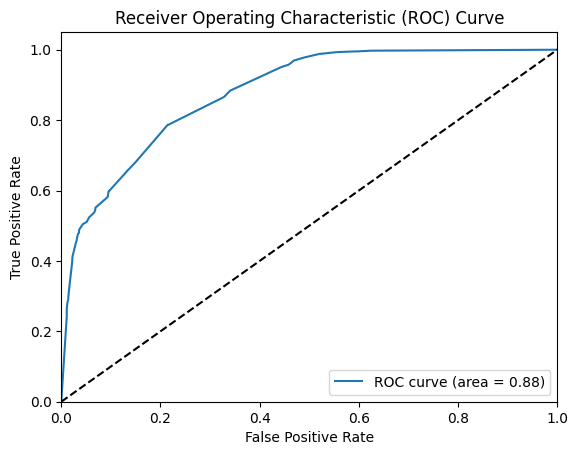

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.877796138090364
Accuracy for each fold: [0.8, 0.7733333333333333, 0.84, 0.83, 0.78, 0.8466666666666667, 0.8093645484949833, 0.822742474916388, 0.7725752508361204, 0.7926421404682275]
Mean accuracy: 0.8067324414715719
95% confidence interval: (0.7871462284732175, 0.8263186544699263)


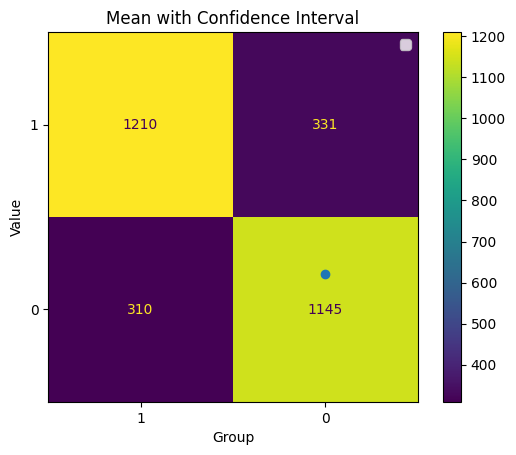

In [16]:
decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



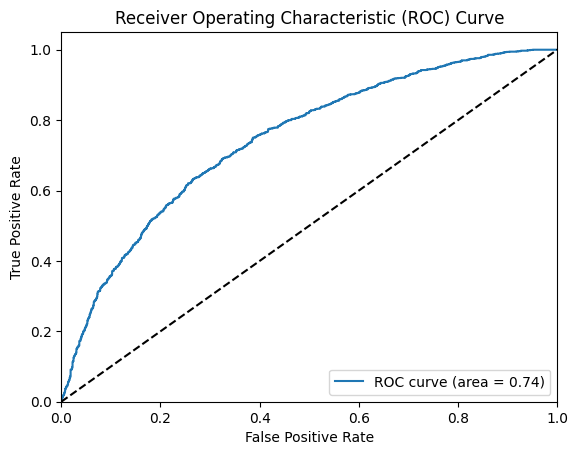

AUC Score: 0.7443820788482509


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6566666666666666, 0.67, 0.6366666666666667, 0.6733333333333333, 0.7033333333333334, 0.63, 0.7123745819397993, 0.6421404682274248, 0.7357859531772575, 0.6722408026755853]
Mean accuracy: 0.6732541806020066
95% confidence interval: (0.6484622662849414, 0.6980460949190718)


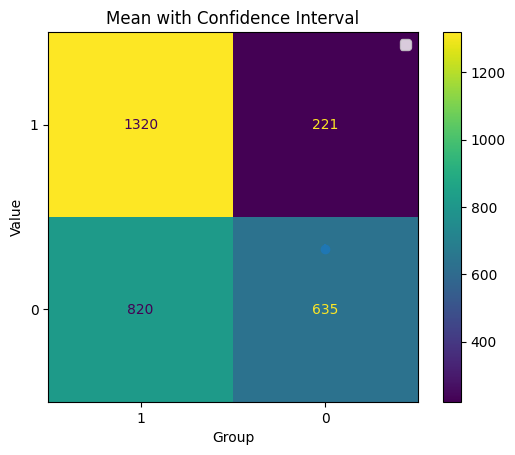

In [17]:
svm = ML_algorithms.model_svm(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1541
           1       0.78      0.79      0.78      1455

    accuracy                           0.79      2996
   macro avg       0.79      0.79      0.79      2996
weighted avg       0.79      0.79      0.79      2996

Node Labels:
 Annotation(0.579859, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3429, 3559]\nclass = 1')


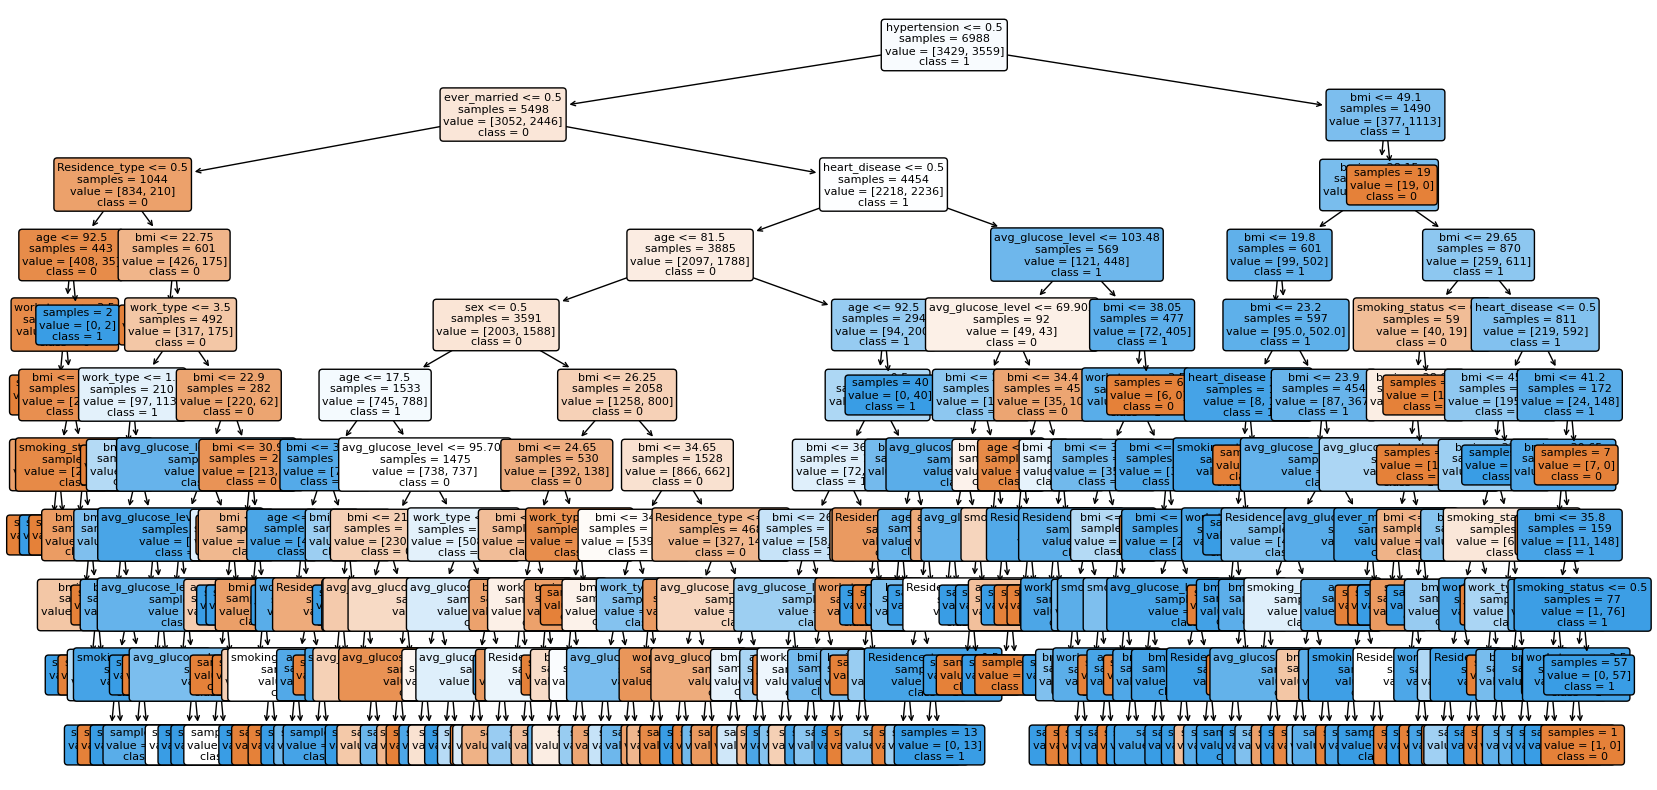

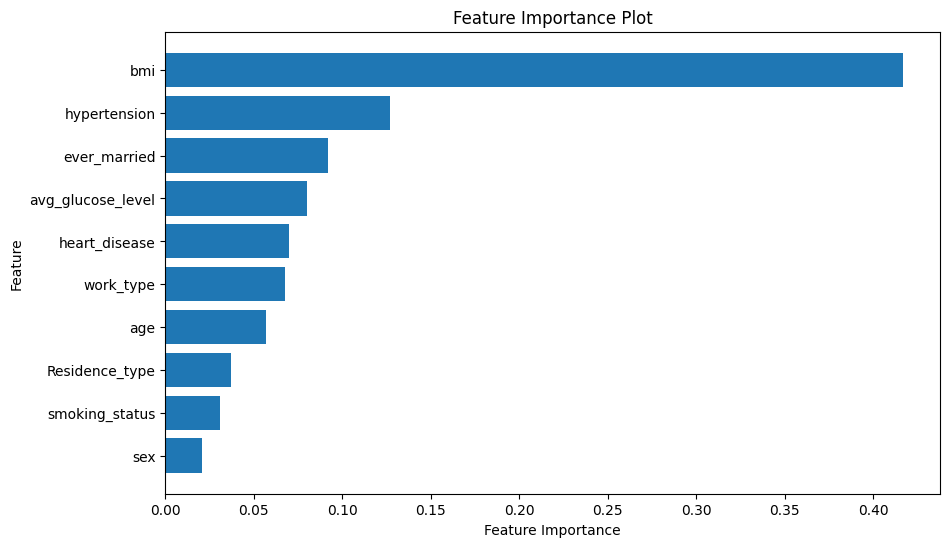

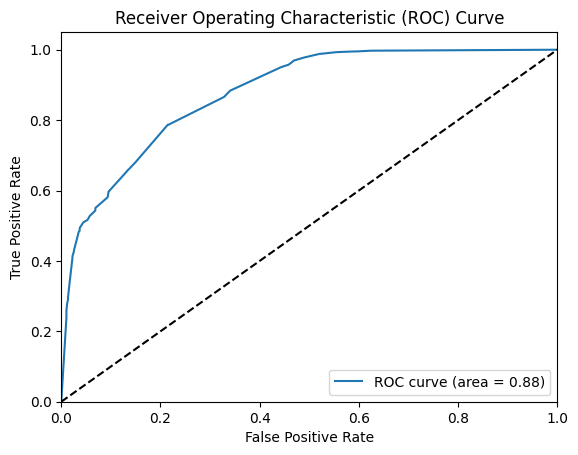

AUC Score: 0.8779903708708809


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8033333333333333, 0.79, 0.8133333333333334, 0.8433333333333334, 0.8, 0.8333333333333334, 0.822742474916388, 0.7725752508361204, 0.7759197324414716, 0.8060200668896321]
Mean accuracy: 0.8060590858416946
95% confidence interval: (0.7895453556163549, 0.8225728160670344)


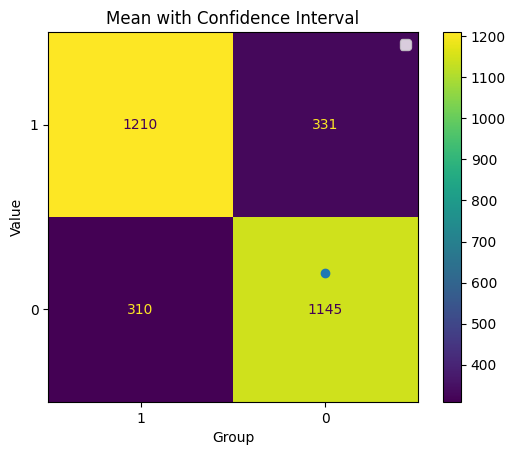

In [20]:
decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



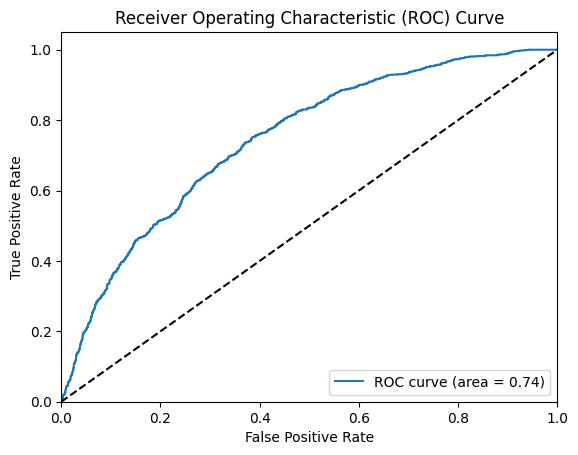

AUC Score: 0.744685804505041


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6433333333333333, 0.7066666666666667, 0.6533333333333333, 0.7166666666666667, 0.6133333333333333, 0.7066666666666667, 0.6488294314381271, 0.6321070234113713, 0.705685618729097, 0.6722408026755853]
Mean accuracy: 0.669886287625418
95% confidence interval: (0.6435169855083562, 0.6962555897424798)


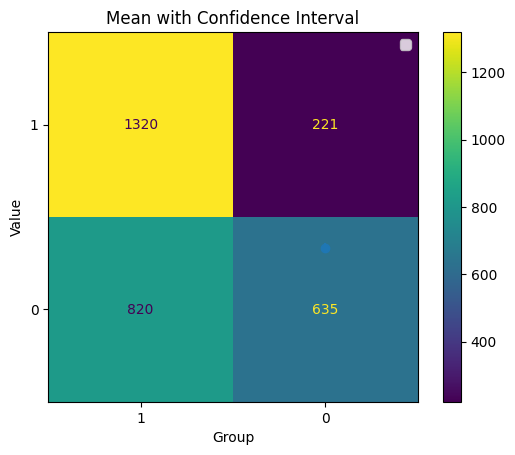

--------------------------------------


In [21]:
svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


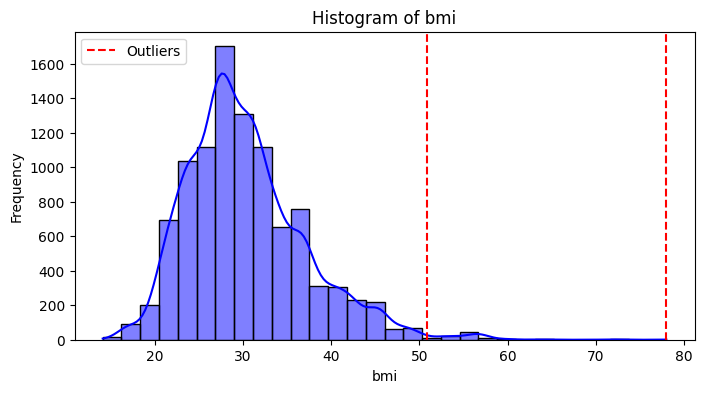

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 50)

Outliers found:


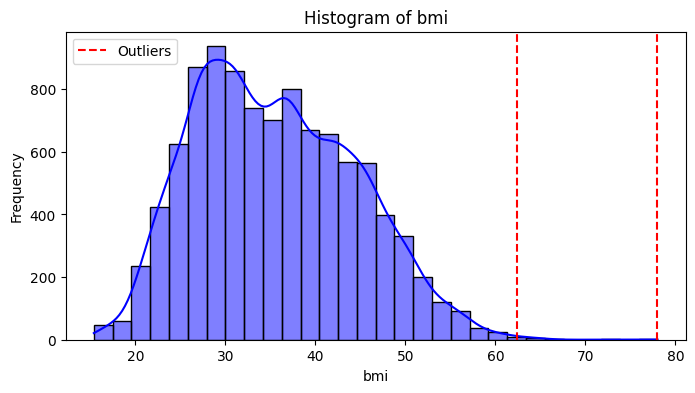

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1541
           1       0.83      0.83      0.83      1455

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.84      2996
weighted avg       0.84      0.84      0.84      2996

Node Labels:
 Annotation(0.688481, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3454, 3534]\nclass = 1')


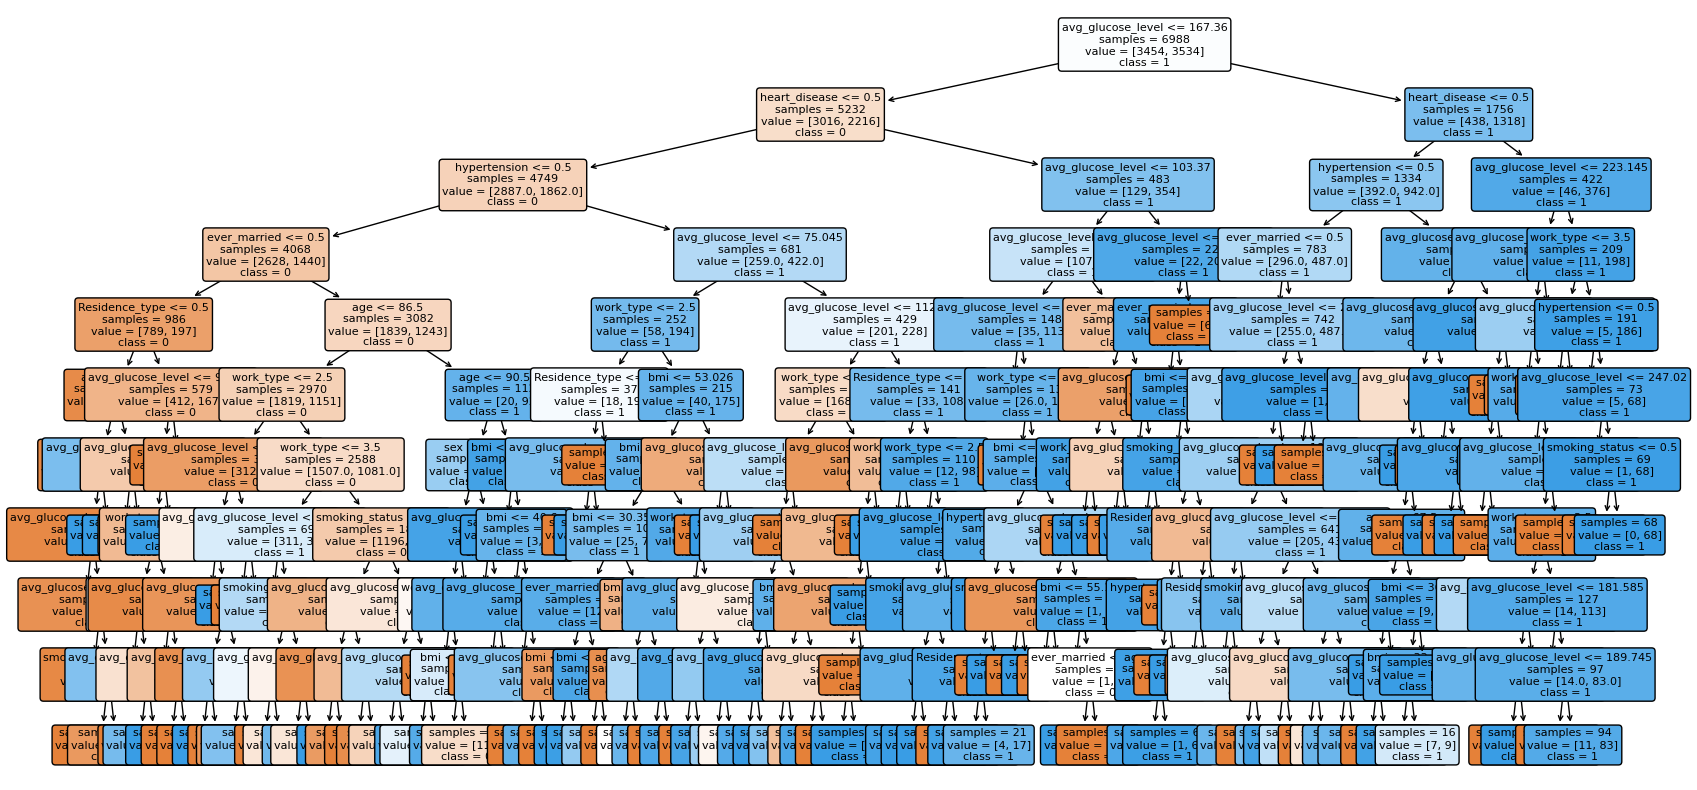

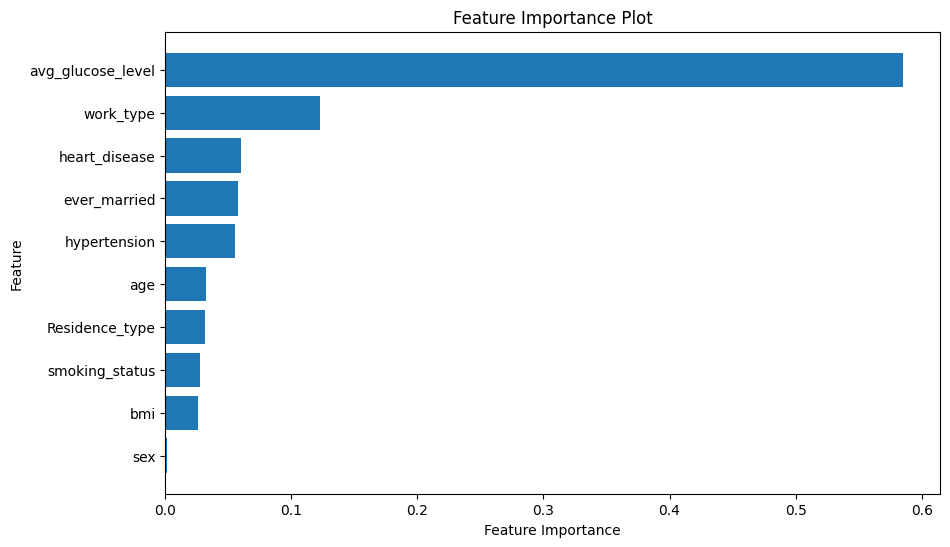

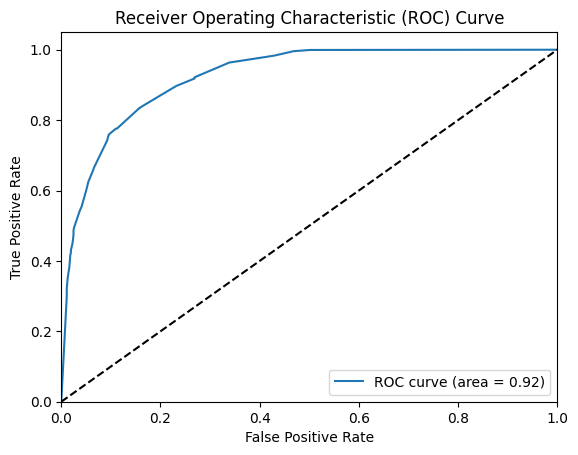

AUC Score: 0.9232845186884939


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8166666666666667, 0.8266666666666667, 0.8133333333333334, 0.81, 0.7733333333333333, 0.7566666666666667, 0.8193979933110368, 0.802675585284281, 0.802675585284281, 0.8561872909698997]
Mean accuracy: 0.8077603121516166
95% confidence interval: (0.7880956690455357, 0.8274249552576974)


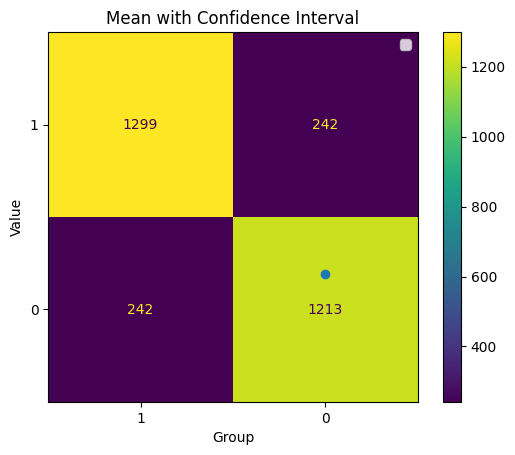

In [26]:
decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1541
           1       0.70      0.61      0.65      1455

    accuracy                           0.68      2996
   macro avg       0.68      0.68      0.68      2996
weighted avg       0.68      0.68      0.68      2996



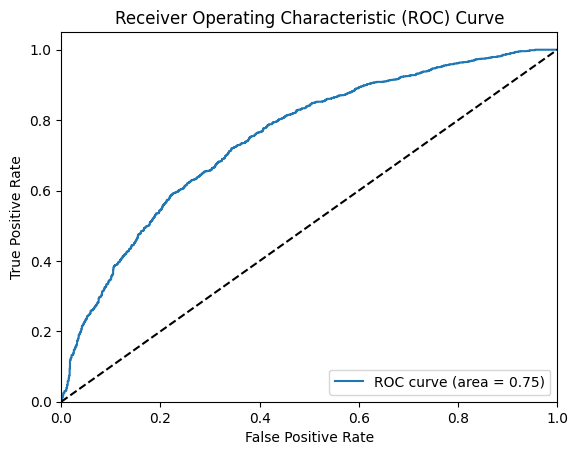

AUC Score: 0.7493375792485355


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7333333333333333, 0.68, 0.59, 0.6966666666666667, 0.67, 0.6666666666666666, 0.705685618729097, 0.6588628762541806, 0.68561872909699, 0.6387959866220736]
Mean accuracy: 0.6725629877369008
95% confidence interval: (0.6445686688665866, 0.700557306607215)


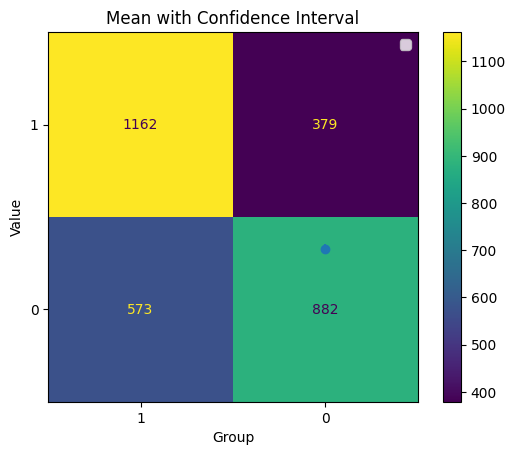

In [27]:
svm = ML_algorithms.model_svm(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'age')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1541
           1       0.84      0.83      0.83      1455

    accuracy                           0.84      2996
   macro avg       0.84      0.84      0.84      2996
weighted avg       0.84      0.84      0.84      2996

Node Labels:
 Annotation(0.683489, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3454, 3534]\nclass = 1')


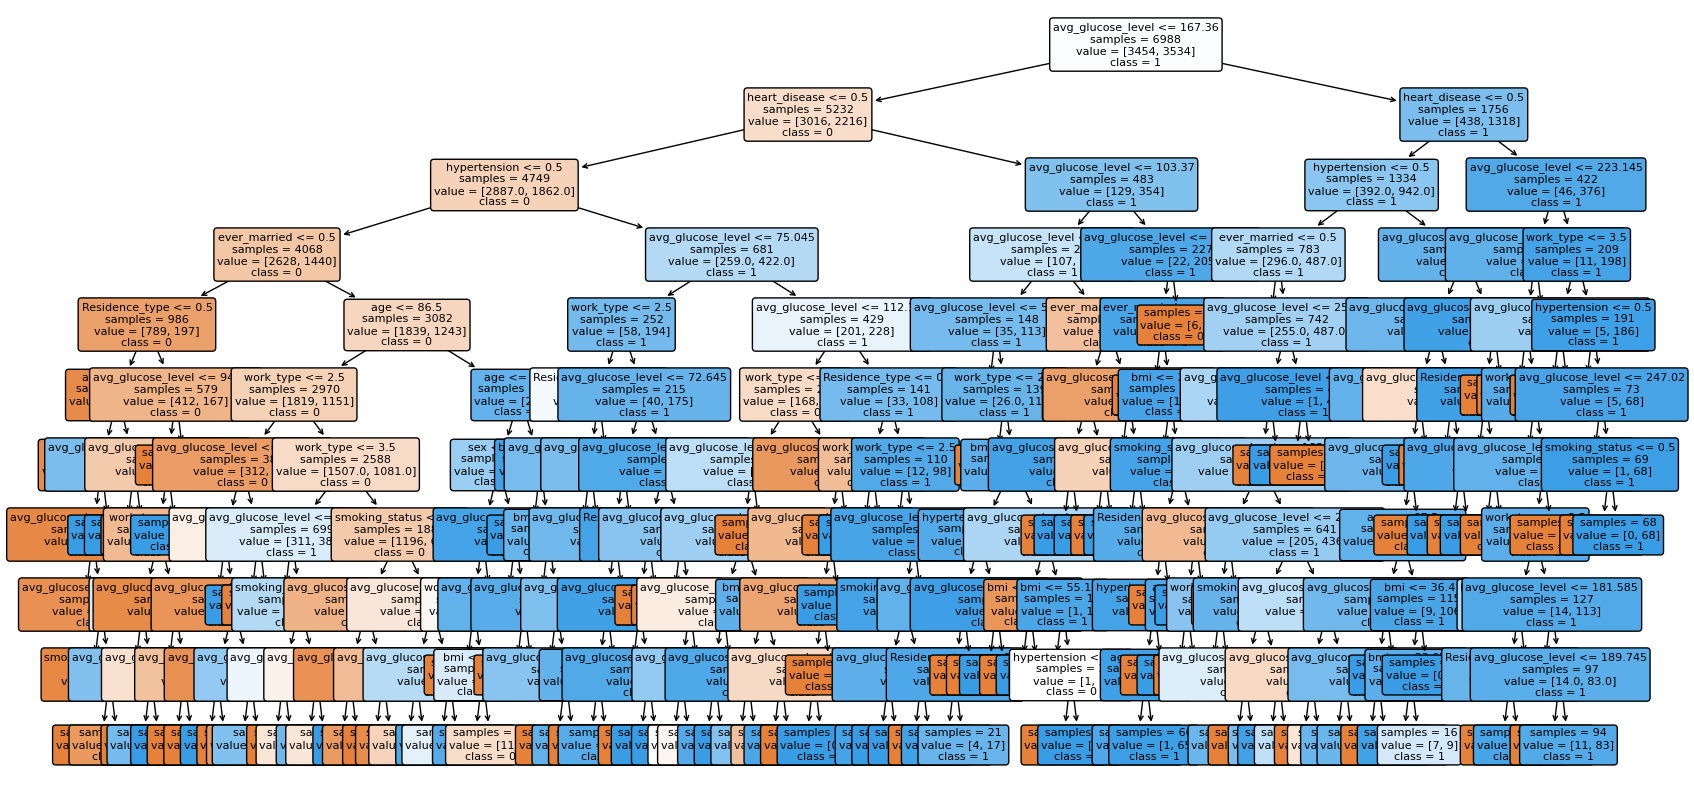

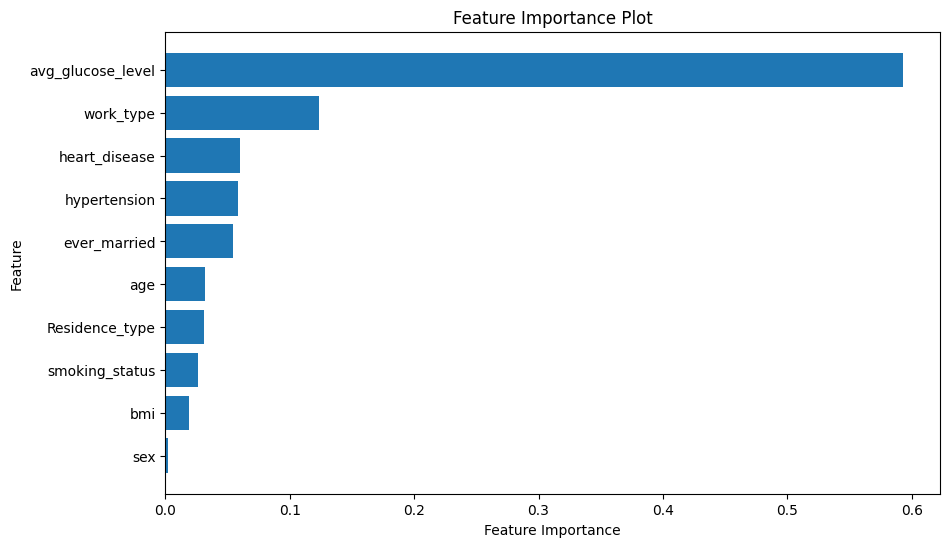

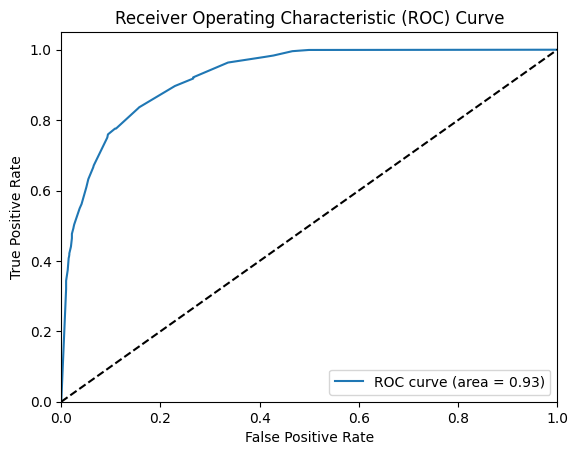

AUC Score: 0.9251175766171384


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7933333333333333, 0.82, 0.7933333333333333, 0.81, 0.78, 0.7866666666666666, 0.802675585284281, 0.8093645484949833, 0.8093645484949833, 0.8060200668896321]
Mean accuracy: 0.8010758082497214
95% confidence interval: (0.792237353958137, 0.8099142625413057)


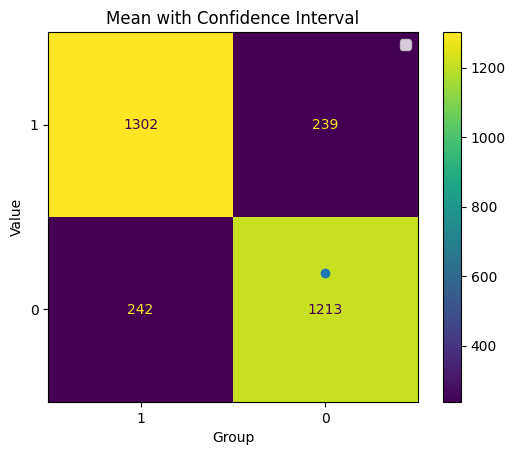

In [30]:
decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1541
           1       0.70      0.61      0.65      1455

    accuracy                           0.68      2996
   macro avg       0.68      0.68      0.68      2996
weighted avg       0.68      0.68      0.68      2996



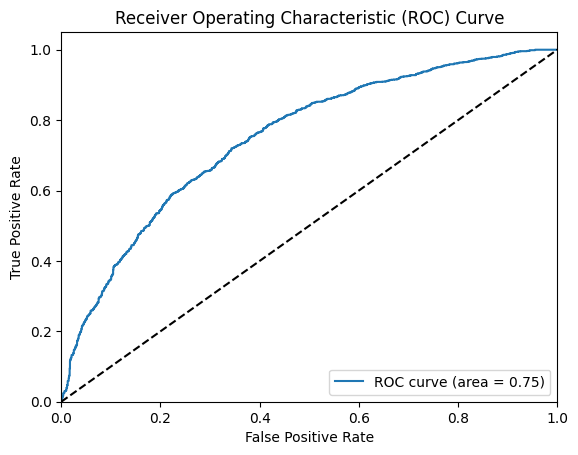

AUC Score: 0.7493170632717185


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6566666666666666, 0.66, 0.6366666666666667, 0.71, 0.7233333333333334, 0.6966666666666667, 0.5953177257525084, 0.6755852842809364, 0.6755852842809364, 0.6923076923076923]
Mean accuracy: 0.6722129319955407
95% confidence interval: (0.6454117632893418, 0.6990141007017395)


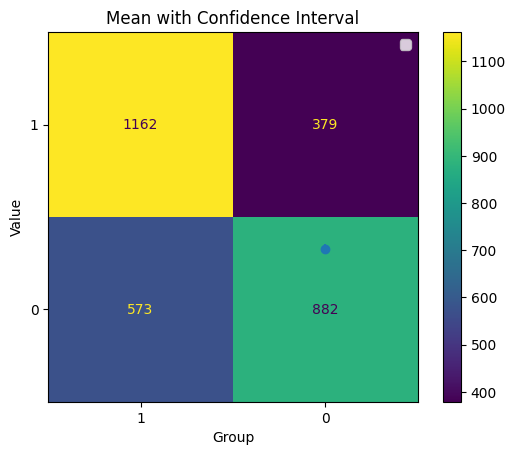

--------------------------------------


In [31]:
svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

# Categorical

In [32]:
df = df_original.copy()

--------------------------------------
Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


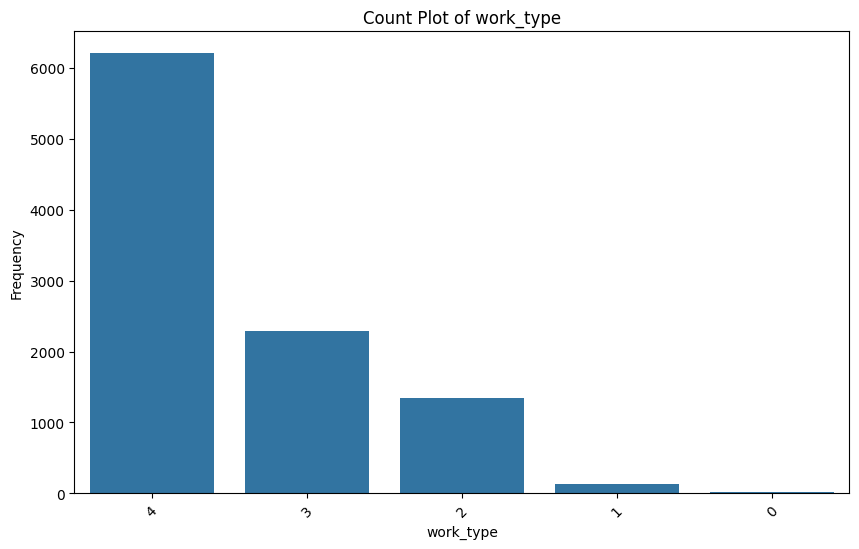

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 50, df)

Valore meno frequente:  0


Value counts:
work_type
0    5003
4    3134
3    1134
2     663
1      50
Name: count, dtype: int64
Outliers detected: [0, 4, 3, 2, 1]
Outliers found:


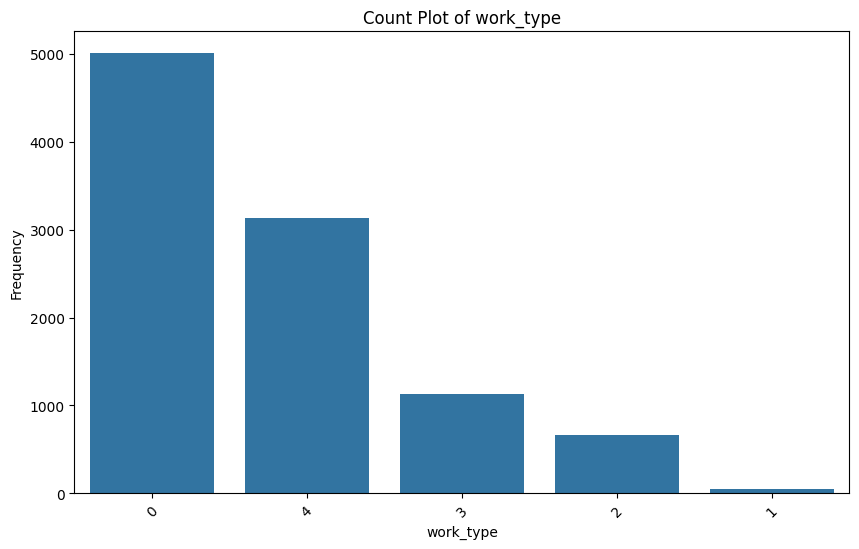

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.79      0.82      1541
           1       0.79      0.87      0.83      1455

    accuracy                           0.83      2996
   macro avg       0.83      0.83      0.83      2996
weighted avg       0.83      0.83      0.83      2996

Node Labels:
 Annotation(0.622893, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


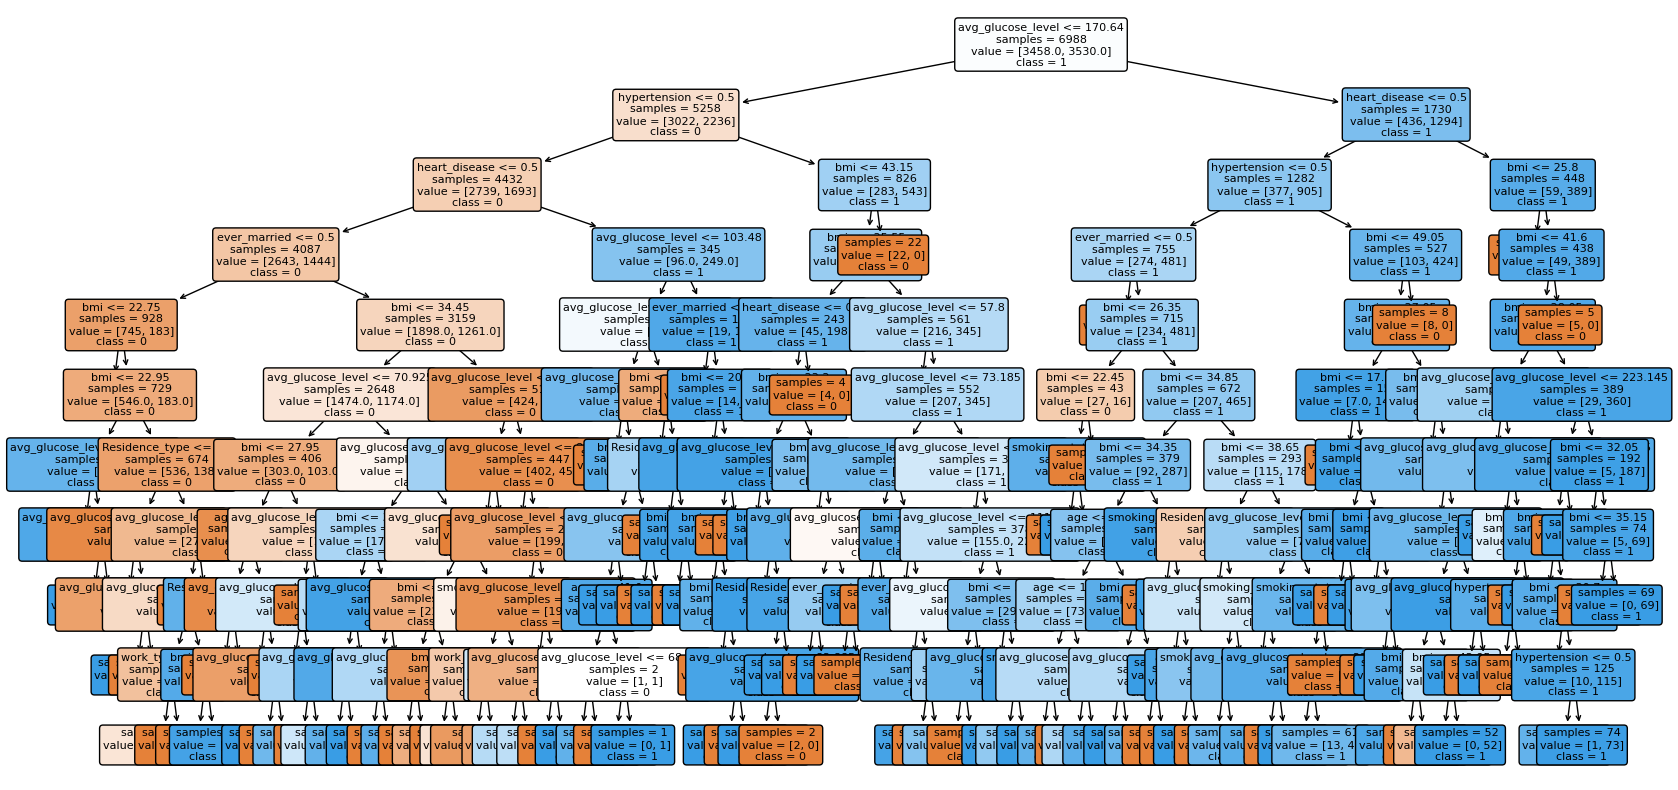

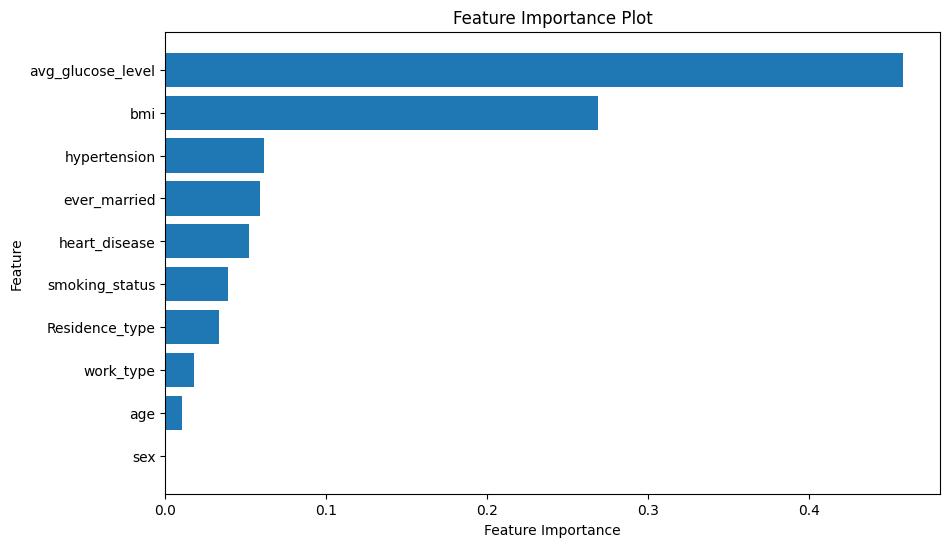

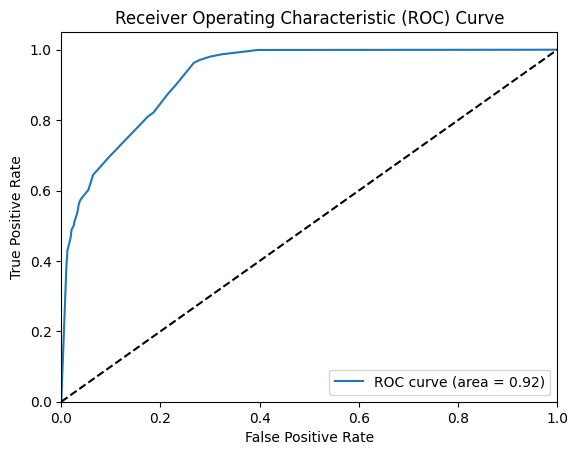

AUC Score: 0.9244905013257335


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8766666666666667, 0.85, 0.82, 0.83, 0.8233333333333334, 0.7766666666666666, 0.7525083612040134, 0.7892976588628763, 0.7792642140468228, 0.7993311036789298]
Mean accuracy: 0.8097068004459308
95% confidence interval: (0.7829142006646254, 0.8364994002272362)


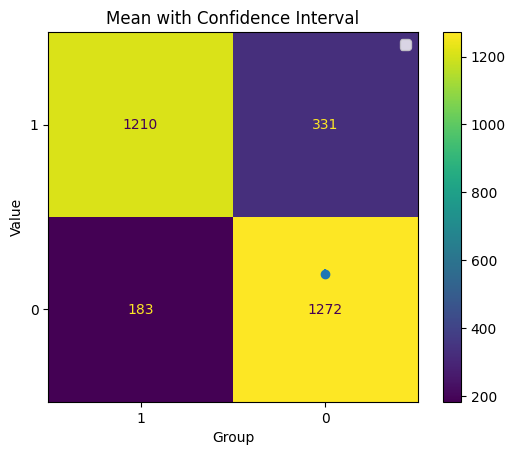

In [36]:
decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1541
           1       0.72      0.55      0.62      1455

    accuracy                           0.67      2996
   macro avg       0.68      0.67      0.67      2996
weighted avg       0.68      0.67      0.67      2996



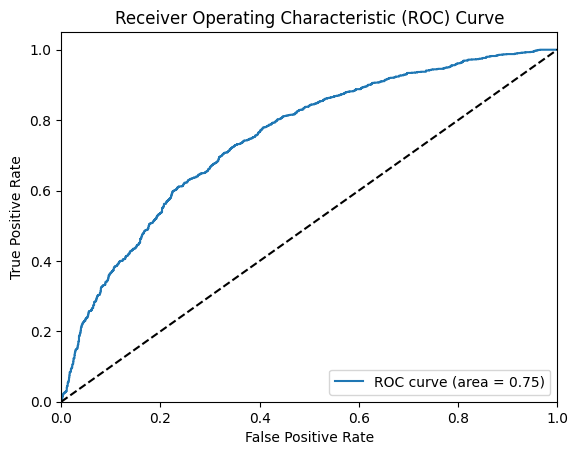

AUC Score: 0.7496163289335483


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7133333333333334, 0.68, 0.6566666666666666, 0.6366666666666667, 0.6933333333333334, 0.6233333333333333, 0.68561872909699, 0.6321070234113713, 0.6923076923076923, 0.6755852842809364]
Mean accuracy: 0.6688952062430323
95% confidence interval: (0.6473217501615347, 0.69046866232453)


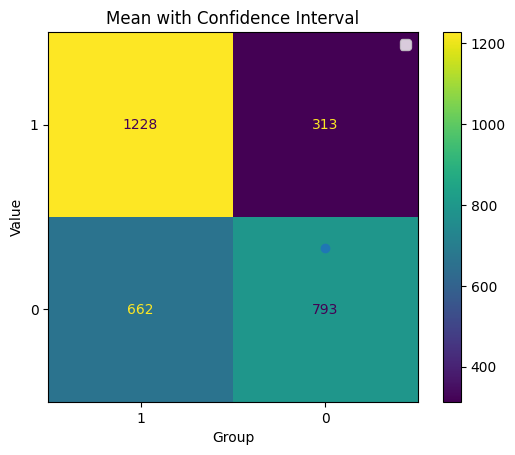

--------------------------------------


In [37]:
svm = ML_algorithms.model_svm(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm,df_original)

print('--------------------------------------')